# Q2. Implement a Multi-layer perceptron model and test the model using any data set ofyour choice. The output should include Accuracy, Error rate, Precision, and recall rate along with the confusion matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

In [3]:
data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In [5]:
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['sales'])

In [6]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.61435188
Iteration 2, loss = 0.57377449
Iteration 3, loss = 0.55308069
Iteration 4, loss = 0.51982363
Iteration 5, loss = 0.49410878
Iteration 6, loss = 0.49836247
Iteration 7, loss = 0.46911135
Iteration 8, loss = 0.47278825
Iteration 9, loss = 0.47082862
Iteration 10, loss = 0.45929109
Iteration 11, loss = 0.45983186
Iteration 12, loss = 0.45497901
Iteration 13, loss = 0.45639166
Iteration 14, loss = 0.45159498
Iteration 15, loss = 0.45325208
Iteration 16, loss = 0.46638642
Iteration 17, loss = 0.45259057
Iteration 18, loss = 0.45551172
Iteration 19, loss = 0.46044584
Iteration 20, loss = 0.45764581
Iteration 21, loss = 0.46315461
Iteration 22, loss = 0.44047490
Iteration 23, loss = 0.42967060
Iteration 24, loss = 0.41790312
Iteration 25, loss = 0.39513711
Iteration 26, loss = 0.38398500
Iteration 27, loss = 0.36297506
Iteration 28, loss = 0.35270000
Iteration 29, loss = 0.34618765
Iteration 30, loss = 0.32700979
Iteration 31, loss = 0.32379188
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [20]:
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print("Accuracy Score is : ", accuracy_score(y_test,ypred))
print("Error rate is : ", 1-(accuracy_score(y_test,ypred)))

Accuracy Score is :  0.938
Error rate is :  0.062000000000000055


In [16]:
from sklearn.metrics import confusion_matrix as cm, recall_score as rs, precision_score as ps
cm(y_test,ypred)
pd.crosstab(y_test, ypred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted     0    1   All
True                      
0          2175  119  2294
1            67  639   706
All        2242  758  3000

Text(0.5, 15.0, 'Predicted label')

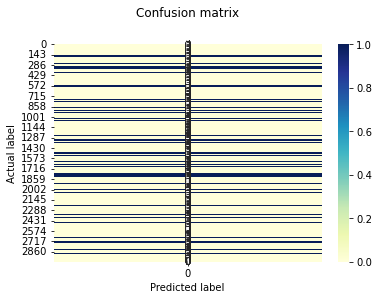

In [17]:
p = sns.heatmap(pd.DataFrame(ypred), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",ps(y_test, ypred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",rs(y_test, ypred))

Precision: 0.8430079155672823
Recall: 0.9050991501416431
